In [1]:
%pylab inline 
import networkx as nx
from numpy import *
from scipy.linalg import block_diag
from scipy import sparse
import matplotlib.colors as colors
import pylab
import sys
import string
import pandas as pd


import gudhi as gd


sys.path.append('../code')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from MMC_util import *
from MMC_plot_util import *
from NNO_util_minh import *

In [3]:
def draw_toy_graph(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax,color_title=''):
   
    pos = nx.get_node_attributes(G,'pos')
    #vmin=0#min(edge_colors)
    #vmax=1#max(edge_colors)

    
    nodes_draw = nx.draw_networkx_nodes(G,
                       pos=pos, 
                       node_color = node_colors, 
                       node_size=node_size,
                       cmap=node_cmap,
                       vmin=vmin,
                       alpha=1,
                       vmax=vmax,
                       label=list(G.nodes()),
                       ax=ax)
    nodes_draw.set_edgecolor('k')

    edges_draw = nx.draw_networkx_edges(G,
                       pos=pos, 
                       edge_color=edge_colors,
                       edge_cmap=edge_cmap,
                       edge_vmin=vmin,
                       edge_vmax=vmax,
                       node_size=node_size,
                       ax=ax,
                       width=edge_width,
                       alpha=1,
                       arrows=True,
                       arrowsize=20)

    edge_labels = dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    edgelabels_draw = nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    nodeslabels_draw = nx.draw_networkx_labels(G,pos)
    #fig1.tight_layout(nodes_draw)
    ax.axis('off')
    #ax.set_xlim([-1,1])
    #ax.set_ylim([-2,1])
    # make colorbar
    sm = plt.cm.ScalarMappable(cmap=s, norm=plt.Normalize(vmin = vmin, vmax=vmax))
    sm._A = []
    plt.colorbar(sm,label=color_title)
    
    return 

def get_pageRank_net_flow(A,alpha):
    p_rank = pagerank (A,alpha)
    P = google_matrix (A,alpha)
    F =  np.dot(np.diag(p_rank),P) # net flows over edges
    return F

def get_edge_colors(A,matrix):
        C = (np.array(np.where(A)))[0]
        D = (np.array(np.where(A)))[1]
        m = np.zeros(len(C))
        for t in range(len(C)):
            m[t] = matrix[C[t],D[t]]
    
        return m
    
def get_filtration_matrix(XX,max_value=.1,numsteps=8):
    
    #symmetrize input matrix
    m,n = shape(XX)
    XX = max_matrix(XX,m,n)
    
    #filtration_matrix = (XX==0)*np.max(XX)*10 + XX #make non-edges some huge number
    filtration_matrix = (XX==0)*max_value + XX #make non-edges some huge number
    filtration_matrix = filtration_matrix  - np.diag(np.diag(filtration_matrix))
    return filtration_matrix, np.linspace(0,np.max(XX),numsteps)



def get_weighted_filtration(G, # original graph
                            filtration_matrix,#matrix to filter 
                            filtration_steps):#steps for filtering

    labels = list(G.nodes())#node names
    
    GG = G
    filtration=[]
    for k,step in enumerate(filtration_steps):
        AA = np.array( filtration_matrix <= step,int)
        for i in range(len(AA)):
            AA[i,i] = 0
        A2 = pd.DataFrame(AA, index=labels, columns=labels)    
        GG = nx.to_networkx_graph(A2)
        #mapping = dict(zip(GG, string.ascii_lowercase))
        #GG = nx.relabel_nodes(G, mapping)  # nodes are characters a through z
        filtration.append(GG)
    return filtration

 
def make_wfiltration_fig(G,nets,titles,y_label):
    
    pos = nx.get_node_attributes(G,'pos')
    
    fig, ax = plt.subplots(1,len(nets),figsize=(16,3))
#    ax = axes.flatten()

    for i in range(len(nets)):
        nx.draw_networkx(nets[i], 
                         pos=pos,
                         ax=ax[i], 
                         node_size=800,
                         #font_size=19,
                         node_color='lightgray')  
        ax[i].set_title(titles[i])
        ax[i].set_xlim([-1,1])
        ax[i].set_ylim([-1.5,1])        
        ax[i].axis('off')
        if i==0:
             ax[i].set_ylabel(y_label)
#    plt.show()
    plt.tight_layout();
    #savefig('VR_filtration.pdf');
    return fig,ax



def get_filtration_matrix_3(XX,max_value=.1,numsteps=8):
    
    #symmetrize input matrix
    m,n = shape(XX)
    XX = max_matrix(XX,m,n)
    
    fil_matrix = max_value - XX
    fil_matrix = fil_matrix - np.diag(np.diag(fil_matrix))
    
#    return fil_matrix, max_value - np.linspace(0,max_value,numsteps)
    return fil_matrix, max_value - np.linspace(.003,max_value*.95,numsteps)


In [4]:
def draw_toy_graph2(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax,color_title=''):
   
    pos = nx.get_node_attributes(G,'pos')
    #vmin=0#min(edge_colors)
    #vmax=1#max(edge_colors)

    
    nodes_draw = nx.draw_networkx_nodes(G,
                       pos=pos, 
                       node_color = node_colors, 
                       node_size=node_size,
                       cmap=node_cmap,
                       vmin=vmin,
                       alpha=1,
                       vmax=vmax,
                       label=list(G.nodes()),
                       ax=ax)
    nodes_draw.set_edgecolor('k')

    edges_draw = nx.draw_networkx_edges(G,
                       pos=pos, 
                       edge_color=edge_colors,
                       edge_cmap=edge_cmap,
                       edge_vmin=vmin,
                       edge_vmax=vmax,
                       node_size=node_size,
                       ax=ax,
                       width=edge_width,
                       alpha=1,
                       arrows=True,
                       arrowsize=20)

    edge_labels = dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    #edgelabels_draw = nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,ax=ax)
    nodeslabels_draw = nx.draw_networkx_labels(G,pos,ax=ax)
    #fig1.tight_layout(nodes_draw)
    ax.axis('off')
    #ax.set_xlim([-1,1])
    #ax.set_ylim([-2,1])
    # make colorbar
    sm = plt.cm.ScalarMappable(cmap=s, norm=plt.Normalize(vmin = vmin, vmax=vmax))
    #sm._A = []
    #plt.colorbar(sm,label=color_title)
    
    return 


In [5]:
def get_1_cycles(diag): # return numpy array of 1-cycles from persistence diagram
    one_cycles = []
    for d in diag:
        if d[0]==1:
            one_cycles.append(([d[1][0],d[1][1]])  )
    return np.array(one_cycles).T


In [6]:
def pagerank2 (A,alpha):
    #P = google_matrix (A,alpha)
    P = A.copy()
    for i in range(len(A)):
        d_i = sum(A[i,:])
        print(d_i)
        P[i,i] = 1 - d_i
        print(P[i,i])
    x = np.zeros(len(A))
    x[0] = 1
    x[1] = 1
    x[2] = 1
    x[3] = 1
    x[4] = 1
    x[5] = 1
    x[6] = 1
    x[7] = 1
    x[8] = 1
    x[15] = 1
    x[16] = 1
    x[23] = 1
    x[24] = 1
    x[31] = 1
    x[32] = 1
    x[39] = 1
    x[40] = 1
    x[47] = 1
    x[48] = 1
    x[55] = 1
    x[56] = 1
    x[57] = 1
    x[58] = 1
    x[59] = 1
    x[60] = 1
    x[61] = 1    
    x[62] = 1
    x[63] = 1
    
    x = x/sum(x)
    #print(sum(x))
    for t in range(100000):
        x = np.dot(P.T,x)
        #print(sum(x))
    return x,P  

In [7]:

f1 = plt.figure(figsize=(6,6))
node_size = 500

G=nx.grid_2d_graph(8,8).to_directed()
pos = dict( (n, n) for n in G.nodes() )
labels = dict( ((i, j), i * 10 + j) for i, j in G.nodes() )


<Figure size 432x432 with 0 Axes>

In [8]:
external_edges = [(10,20),(30,40),(50,60),(21,11),(41,31),(61,51),(12,22),(32,42),(52,62),(23,13),(43,33),(63,53),(14,24),(34,44),(54,64),(25,15),(45,35),(65,55),(2,1),(11,12),(22,21),(31,32),(42,41),(51,52),(62,61),(71,72),(4,3),(13,14),(24,23),(33,34),(44,43),(53,54),(64,63),(73,74),(6,5),(15,16),(26,25),(35,36),(46,45),(55,56),(66,65),(75,76),(16,26),(27,17),(36,46),(47,37),(56,66),(67,57)]
internal_edges = [(0,10),(20,30),(40,50),(60,70),(11,1),(31,21),(51,41),(71,61),(2,12),(22,32),(42,52),(62,72),(13,3),(33,23),(53,43),(73,63),(4,14),(24,34),(44,54),(64,74),(15,5),(35,25),(55,45),(75,65),(1,0),(10,11),(21,20),(30,31),(41,40),(50,51),(61,60),(70,71),(3,2),(12,13),(23,22),(32,33),(43,42),(52,53),(63,62),(72,73),(5,4),(14,15),(25,24),(34,35),(45,44),(54,55),(65,64),(74,75),(76,77),(47,46),(27,26),(7,6),(67,66),(76,77),(56,57),(36,37),(16,17),(17,7),(37,27),(77,67),(57,47),(37,27),(17,7),(6,16),(26,36),(46,56),(66,76)]


In [9]:
G.nodes()
N = len(G.nodes())
N

64

In [10]:
A = np.zeros((N,N))

ids = zeros(list(labels.values())[-1]+1,dtype=int)
for i,j in enumerate(list(labels.values())):
    ids[j] = i

In [11]:
temp = nx.DiGraph()
G = nx.from_numpy_matrix(A, create_using=temp)

In [12]:
pos = {}
for i,j in enumerate(labels):
    pos[i] = j

edges = G.edges()
#colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]


In [13]:
gamma_ext = .1
gamma_in = .0001
new_external_edges = []
for edge in external_edges:
    node1 = ids[edge[0]]
    node2 = ids[edge[1]]
    A[node1,node2] = gamma_ext
    new_external_edges.append((node1,node2))
    

new_internal_edges = []
for edge in internal_edges:
    node1 = ids[edge[0]]
    node2 = ids[edge[1]]
    A[node1,node2] = gamma_in    
    new_internal_edges.append((node1,node2))


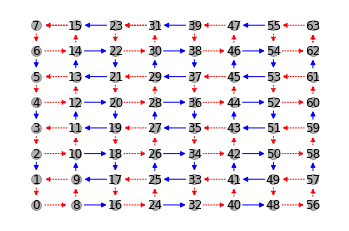

<Figure size 432x288 with 0 Axes>

In [14]:
nx.draw_networkx_nodes(G, pos=pos, cmap=plt.get_cmap('jet'), 
                       node_color = 'k', node_size = 100,alpha=.3)
nx.draw_networkx_labels(G, pos=pos)
nx.draw_networkx_edges(G, pos = pos, edgelist=new_external_edges,style = 'solid', edge_color = 'b',arrows=True)
nx.draw_networkx_edges(G, pos = pos, edgelist=new_internal_edges,style = 'dotted', edge_color = 'r', arrows=True)

#nx.draw_networkx(G, pos=pos, labels=labels)
#labelss = nx.draw_networkx_labels (G, pos = labels1)
plt.axis('off')
plt.show()
plt.tight_layout()


In [15]:
def convert_F_to_small_F(F):

    small_F = np.zeros((int(len(F)/4),int(len(F)/4)))

    #node 0 (left square, top row)
    small_F[0,1] = F[6,5]
    small_F[1,0] = F[13,14]
    small_F[0,4] = F[14,22]
    small_F[4,0] = F[23,15]

    #node 1 (left square, second row)
    small_F[1,2] = F[4,3]
    small_F[2,1] = F[11,12]
    small_F[1,5] = F[12,20]
    small_F[5,1] = F[21,13]

    #node 2 (left square, third row)
    small_F[2,3] = F[2,1]
    small_F[3,2] = F[9,10]
    small_F[2,6] = F[10,18]
    small_F[6,2] = F[19,11]

    #node 3 (left square, fourth row)
    #small_F[3,4] = F[2,1]
    #small_F[4,3] = F[9,10]
    small_F[3,7] = F[8,16]
    small_F[7,3] = F[17,9]

    #node 4 (left-middle square, first row)
    small_F[4,5] = F[22,21]
    small_F[5,4] = F[29,30]
    small_F[4,8] = F[30,38]
    small_F[8,4] = F[39,31]

    #node 5 (left-middle square, second row)
    small_F[5,6] = F[20,19]
    small_F[6,5] = F[27,28]
    small_F[5,9] = F[28,36]
    small_F[9,5] = F[37,29]

    #node 6 (left-middle square, third row)
    small_F[6,7] = F[18,17]
    small_F[7,6] = F[25,26]
    small_F[6,10] = F[26,34]
    small_F[10,6] = F[35,27]


    #node 7 (left-middle square, third row)
    #small_F[7,8] = F[2,1]
    #small_F[8,7] = F[9,10]
    small_F[7,11] = F[24,32]
    small_F[11,7] = F[33,25]


    #node 8 (left-middle square, third row)
    small_F[8,9] = F[38,37]
    small_F[9,8] = F[45,46]
    small_F[8,12] = F[46,54]
    small_F[12,8] = F[55,47]

    #node 9 (left-middle square, third row)
    small_F[9,10] = F[36,35]
    small_F[10,9] = F[43,44]
    small_F[9,13] = F[44,52]
    small_F[13,9] = F[53,45]

    #node 10 (left-middle square, third row)
    small_F[10,11] = F[34,33]
    small_F[11,10] = F[41,42]
    small_F[10,14] = F[42,50]
    small_F[14,10] = F[51,43]

    #node 11 (left-middle square, third row)
    ##small_F[11,12] = F[2,1]
    #small_F[12,11] = F[9,10]
    small_F[11,15] = F[40,48]
    small_F[15,11] = F[49,41]



    #node 12 (left-middle square, third row)
    small_F[12,13] = F[54,53]
    small_F[13,12] = F[61,62]

    #node 13 (left-middle square, third row)
    small_F[13,14] = F[52,51]
    small_F[14,13] = F[59,60]

    #node 14 (left-middle square, third row)
    small_F[14,15] = F[50,49]
    small_F[15,14] = F[57,58]

    #node 15 (left-middle square, third row)

    return small_F

In [16]:
def pagerank1 (A,alpha):
#    P = google_matrix (A,alpha)
    P = A.copy()
    for i in range(len(A)):
        d_i = sum(A[i,:])
  #      print(d_i)
        P[i,i] = 1 - d_i
 #       print(P[i,i])

    x = np.ones(len(A))
    x = x/sum(x)
    for t in range(10000):
         x = np.dot(P.T,x)
    return x,P 
    
    


In [17]:
def get_pageRank_net_flow(A,alpha):
    p_rank,P = pagerank1 (A,alpha)
    #P = google_matrix (A,alpha)
    F =  np.dot(np.diag(p_rank),P) # net flows over edges
    return F


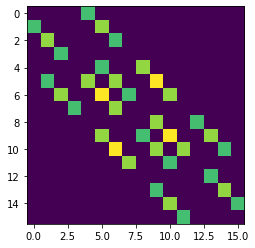

In [18]:
F = get_pageRank_net_flow(A,1)
small_F = convert_F_to_small_F(F)
imshow(small_F)


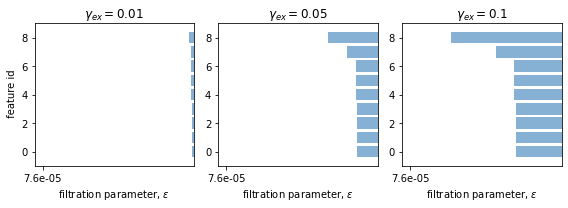

In [19]:
Fs2= []
Deltas = []
Deltas2 = []
As2 = []
gamma_exts = [.01,.05,.1]
gamma_in = .001
f1,ax = subplots(1,len(gamma_exts),figsize=(8,3),sharex=True)       

for i,j in enumerate(gamma_exts):
    new_external_edges = []
    for edge in external_edges:
        node1 = ids[edge[0]]
        node2 = ids[edge[1]]
        A[node1,node2] = gamma_exts[i]
        new_external_edges.append((node1,node2))


    new_internal_edges = []
    for edge in internal_edges:
        node1 = ids[edge[0]]
        node2 = ids[edge[1]]
        A[node1,node2] = gamma_in    
        new_internal_edges.append((node1,node2))
        alpha = 1
    
    
    
    
    

    ######
    F = get_pageRank_net_flow(A,alpha)
    small_F = convert_F_to_small_F(F)

    #F = get_fraction_of_outward_flow(F)
    ######
    
    
    Fs2.append(small_F)
    Delta = (small_F - small_F.T)
    Deltas2.append(Delta)
    
    m,n = shape(Delta)
    Delta_symmetric = max_matrix(Delta,m,n) # magnitude of imbalance for net flows 
    max_value = 7.95505092089617e-05
    #max_value = np.max(Delta_symmetric)*1.01
    #print(F)
    Deltas.append(Delta_symmetric)
    As2.append(A)
    fil_matrix,fil_steps =  get_filtration_matrix_3(Delta_symmetric,max_value=max_value,numsteps=3)
    diag = dist2PD (fil_matrix, max_dim=2, max_edge_length=1)[1]    
    
    diag1 = []
    for dd in diag:
        if dd[0] == 1:
            diag1.append(dd)
        
    gd.plot_persistence_barcode (persistence=diag1,axes=ax[i])
    
    values = [ round(max_value-xx,6)  for xx in fil_steps]
    #ax[i].set_xlim([-.00002,max_value])
    ax[i].set_xticks(fil_steps)
        
    ax[i].set_xticklabels(values)

    ax[i].set_title(r'$\gamma_{ex} ='+ str(j)+'$')
    ax[i].set_ylim([-1,9])
    ax[0].set_ylabel( ' feature id')
    ax[i].set_xlim([0,max_value])

    ax[i].set_xlabel('filtration parameter, $\epsilon$')
plt.tight_layout()
savefig('Pbnew.pdf')

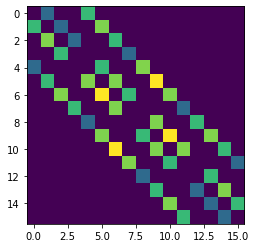

In [20]:
G = nx.from_numpy_matrix(small_F,create_using=nx.DiGraph)
imshow(nx.to_numpy_array(G))

In [21]:
def draw_toy_graph_1(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax,color_title,pos):
   
   # pos = dict( (n, n) for n in G.nodes() )  
    nodes_draw = nx.draw_networkx_nodes(G,
                       pos=pos, 
                       node_color = node_colors, 
                       node_size=node_size,
                       cmap=node_cmap,
                       vmin=vmin,
                       alpha=1,
                       vmax=vmax,
                       label=list(G.nodes()),
                       ax=ax)
    nodes_draw.set_edgecolor('k')

    edges_draw = nx.draw_networkx_edges(G,
                       pos=pos, 
                       edge_color=edge_colors,
                       edge_cmap=edge_cmap,
                       edge_vmin=vmin,
                       edge_vmax=vmax,
                       node_size=node_size,
                       ax=ax,
                       width=edge_width,
                       alpha=1,
                       arrows=True,
                       arrowsize=20,
                       connectionstyle='arc3, rad = .2')

    ax.axis('off')
    return 



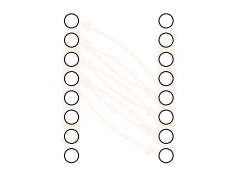

In [22]:
node_colors = .8*np.ones(len(list(G.nodes))) #list(np.random.rand(len(list(G.nodes()))))
node_cmap = plt.cm.gray
    
#F = get_pageRank_net_flow(A,1)
m = get_edge_colors(small_F,small_F)
edge_cmap = plt.cm.Reds
s = edge_cmap
edge_colors = m
node_size = 200
edge_width = 3
vmin = -.001
vmax = .1
color_title=''
fig1,ax = plt.subplots(1,1,figsize=(4,3))
draw_toy_graph_1(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax,color_title,pos)


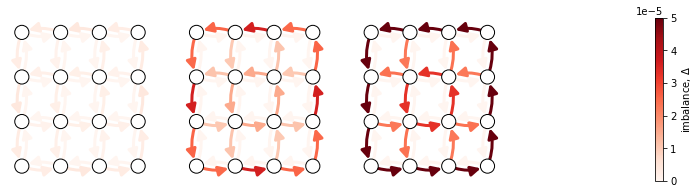

In [23]:
counter = 0
pos_small = np.zeros((len(small_F),2),dtype=int)
for i in range(4):
    for j in range(4):
        pos_small[counter] = [i,j]
        counter = counter + 1
        
pos = {}        
for i in range(len(pos_small)):
    pos[i] = pos_small[i]
    
fig1,ax = plt.subplots(1,4,figsize=(12,3))

for i in range(len(Deltas)):
    node_colors = .8*np.ones(len(list(G.nodes))) #list(np.random.rand(len(list(G.nodes()))))
    node_cmap = plt.cm.gray

    #F = get_pageRank_net_flow(B,1)
    m = get_edge_colors(small_F,Deltas2[i])
    edge_cmap = plt.cm.Reds
    s = edge_cmap
    edge_colors = m
    node_size = 200
    edge_width = 3
    vmin = 0
    vmax = 5e-05
#    vmax = max(m)*1.1
    
    color_title = 'imbalance, $\Delta$'
    #draw_toy_graph_0(H,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax)
    draw_toy_graph_1(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax[i],color_title,pos)


    
    
sm = plt.cm.ScalarMappable(cmap=s, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm,label=color_title)

ax[-1].remove()

#filename = 'f'+str(i)+'.pdf'
#savefig(filename)
savefig('cycle.pdf')